# 실습7. Solving Brownian equation


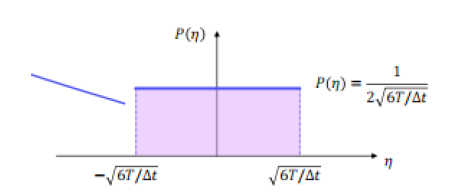


1. $T = 300K$, $\Delta t = 0.1$일 때, 위와 같은 확률 분포를 보이는 $\eta$를 반환하는 rand 함수를 구현하세요.(20점) \\
실행횟수 10번, 100번, 1000번에 대해 각각 히스토그램을 그려서 몇 번 정도 반복해야 충분히 균일한 분포가 나오는지 확인하세요, (10점)

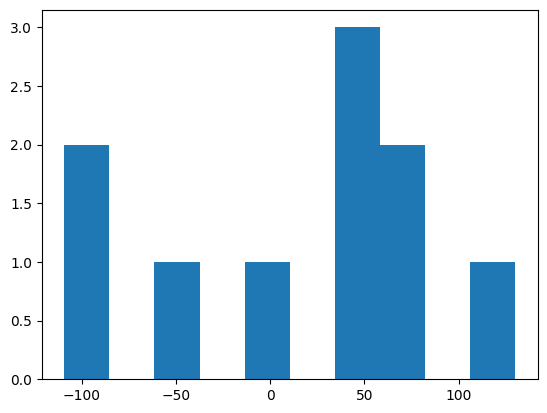

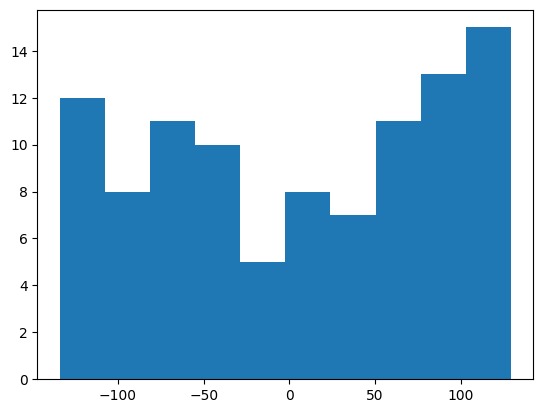

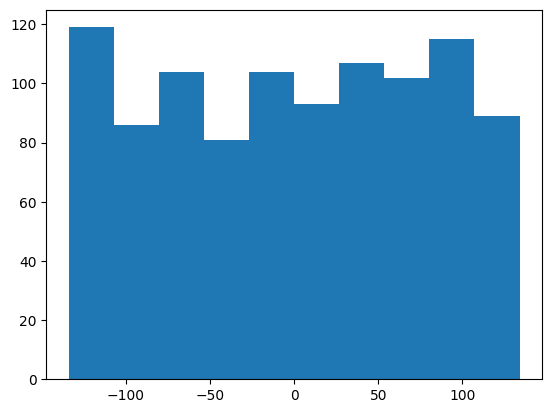

In [3]:
import numpy as np, matplotlib.pyplot as plt

T =300; dt=0.1

def rand(T, dt, size):
    high = np.sqrt(6*T/dt); low = -np.sqrt(6*T/dt)
    return np.random.uniform(low, high, size)

n=[10, 100, 1000]
for i in n:
  a = rand(T, dt, i)
  plt.hist(a)
  plt.show()


위의 코드는 numpy 패키지의 random 모듈을 활용해 주어진 그림과 같은 확률분포를 갖는 rand 함수를 구현한 코드이다. 변수 T와 dt는 문제에서 주어진대로 300과 0.1로 설정하였다. 사용자 정의 함수 rand는 변수 T와 dt와 시행횟수 size를 입력받아 low와 high사이의 값을 무작위로 반환한다. 이때 low와 high는 주어진 그림과 같이 $-\sqrt{\dfrac{6T}{\Delta t}}$와 $\sqrt{\dfrac{6T}{\Delta t}}$로 설정하였다. 이후 rand 함수의 시행횟수를 담은 리스트 n을 만들어 10, 100, 1000을 저장하였으며, for문을 통해 리스트 n의 각 원소값 만큼 rand 함수를 실행시킨 뒤 이를 히스토그램으로 나타내었다. 실행결과를 통해 대략 1000회정도 실행하면 문제에서 주어진 그래프와 유사하게 균일한 그래프가 나옴을 확인할 수 있다.

$$\dfrac{dv}{dt} = -v+\eta(t)$$

2. 위의 확률 미분 방정식을 Runge-Kutta-Helfand-Greenside (RKHG) 방법으로 풀어 $v(t)$를 구하고 $t$의 함수로 그리시오. \\
(단, $v(t=0)=0, x(t=0)=0$, $\eta$는 1번 문제에서 구현한 함수를 사용할 것) (50점)

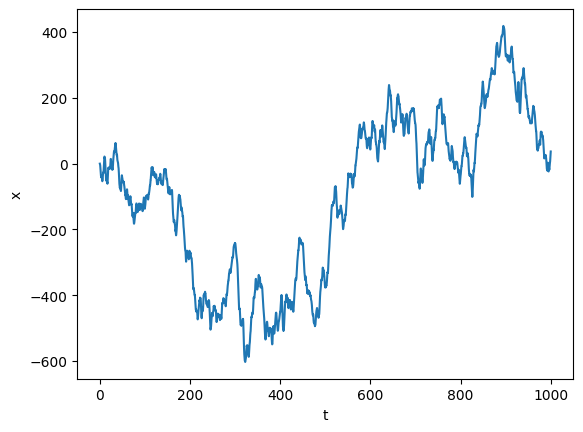

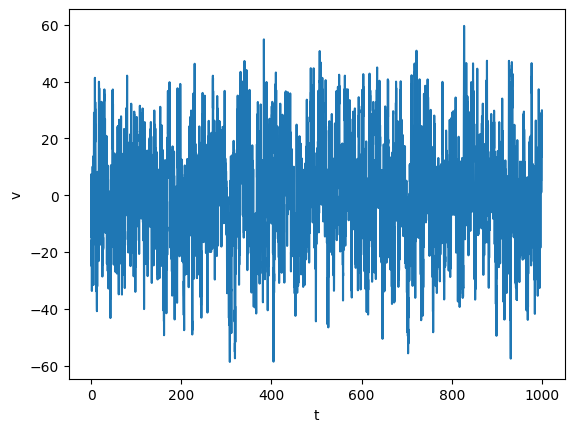

In [5]:
import numpy as np, matplotlib.pyplot as plt
v0 = 0.0; x0 = 0.0; T = 300;
dt = 0.1; maxt = 1000
t_arr = np.arange(0, maxt, dt)
x_arr = []; v_arr = [];

def rand(T, dt, size):
    high = np.sqrt(6*T/dt); low = -np.sqrt(6*T/dt)
    return np.random.uniform(low, high, size)

x, v = x0, v0
for t in t_arr:
  x_arr.append(x); v_arr.append(v)
  eta = rand(T, dt, 1)
  vtem = v
  vbar = v+ dt*(-v+eta[0])
  v += dt*(0.5 *(-v -vbar)+eta[0])
  x += dt*0.5*(vtem+v)

plt.plot(t_arr, x_arr)
plt.xlabel('t')
plt.ylabel('x')
plt.show()
plt.plot(t_arr, v_arr)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

위의 코드는 1번에서 작성한 rand 함수를 활용해 주어진 미분방정식을 RKHG방법으로 푼 뒤 x와 v를 t에 관한 그래프로 표현한 코드이다. 변수 v0와 t0는 v와 t의 초깃값을 나타내며, 문제에서 주어진대로 0으로 설정하였다. 온도 T는 300으로 설정하였으며, dt는 0.1, 시간의 최댓값 maxt는 1000으로 설정하였다. 리스트 t_arr는 시간을 저장하는 함수로 0~maxt의 시간을 dt으로 간격으로 나누어 저장하였다. x_arr와 v_arr는 x값과 v값을 저장하는 리스트이다. 사용자 정의 함수 rand는 1번문제와 동일하게 선언하였다. 이후 for문을 통해 t_arr의 원소들에 대해 RKHG 방법을 적용함으로써 시간에 따른 미분방정식의 해를 구하였다. for문 내의 변수 eta는 브라운 운동에서의 $\eta(t)$를 나타내며, rand함수를 통해 구현하였다. x_arr와 v_arr에 x값과 v값을 저장한 뒤 eta값이 포함된 미분방정식을 RKHG 방법을 통해 풀어 x값과 v값을 업데이트하였다. 이후 x축이 t이고 y축이 x인 그래프와 x축이 t이고 y축이 v인 그래프를 작성하였다.

3. $v(t)^2$를 충분히 넓은 시간 구간(문제 1에 근거한 구간)에서 시간에 따라 평균한 값 $	\langle v^2 \rangle$를 계산해보세요. (10점)

In [13]:
import numpy as np, matplotlib.pyplot as plt
v0 = 0.0; x0 = 0.0; T = 300;
dt = 0.1; maxt = 1000
t_arr = np.arange(0, maxt, dt)
x_arr = []; v_arr = []; v2_arr =[]

def rand(T, dt, size):
    high = np.sqrt(6*T/dt); low = -np.sqrt(6*T/dt)
    return np.random.uniform(low, high, size)

x, v = x0, v0
for t in t_arr:
  x_arr.append(x); v_arr.append(v); v2_arr.append(v**2)
  eta = rand(T, dt, 1)
  vtem = v
  vbar = v+ dt*(-v+eta[0])
  v += dt*(0.5 *(-v -vbar)+eta[0])
  x += dt*0.5*(vtem+v)

print(np.mean(v2_arr))

300.10141800749443


$\langle \dfrac{1}{2}mv^2 \rangle = \dfrac{1}{2}k_bT$에서 $	\langle v^2 \rangle = T$를 만족한다.  
위의 코드는 2번 과정을 통해 구한 $v$에 대해 $	\langle v^2 \rangle$을 구한 코드이다. 전반적인 코드구성은 2번문제와 동일하며, 마지막에 numpy 패키지의 mean을 사용해 전체시간에 대한 $v^2$의 평균값을 출력하였다. 계산결과 300.1이라는 값이 도출되었으며, 이는 문제에서 설정한 $T = 300$과 거의 일치한다는 점에서 위에서 설명한 식을 잘 만족함을 알 수 있다.